In [9]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kick = pd.read_csv('ks-projects-201801.csv')

# set seed for reproducibility
np.random.seed(0)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
kick.shape

(378661, 15)

every sklearn's transform's fit() just calculates the parameters  and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.

Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

In [6]:
original_data = np.random.exponential(size = 1000)
original_data

array([8.98647962e-01, 1.01146770e-02, 6.45931962e-01, 1.23364329e+00,
       4.49716675e-02, 2.11628382e+00, 7.34138807e-01, 3.11409329e-02,
       2.54135906e-01, 3.07208854e+00, 8.73039051e-01, 1.13698029e-01,
       3.39037828e-01, 6.10100299e-01, 2.11726360e-02, 5.30374656e-01,
       6.72283617e-01, 2.79287903e-01, 8.88284105e-01, 1.39933956e+00,
       2.68970529e-01, 9.68900419e-01, 1.02060247e+00, 2.96695632e+00,
       1.50632267e+00, 1.88614885e+00, 6.74168242e-01, 2.04994971e-01,
       5.47631858e+00, 1.38521837e-01, 6.37631719e-01, 7.05223612e-02,
       2.87974387e+00, 3.35026497e+00, 1.27078613e+00, 4.30771906e-01,
       2.93542412e-01, 3.08297551e-01, 1.36156579e-01, 7.46144986e-01,
       1.52938237e-01, 3.80866158e-01, 9.85390241e-01, 1.30027671e+00,
       2.45721421e-02, 5.62322420e-01, 1.05591089e+00, 1.91899740e+00,
       6.44975841e-01, 3.48043125e+00, 3.08745759e-01, 1.36007793e-02,
       6.61169684e-01, 2.95867206e-01, 1.73566843e+00, 2.64972136e-01,
      

In [11]:
scaled_data = minmax_scaling(original_data, columns = [0]) #minmax_ scale the data between 0 and 1


Text(0.5, 1.0, 'Scaled data')

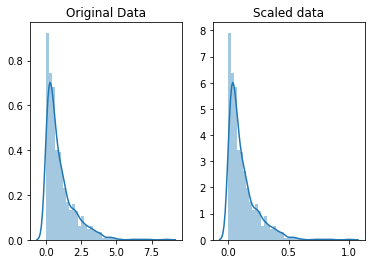

In [54]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

(array([461., 242., 134.,  68.,  46.,  22.,  16.,   4.,   2.,   5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

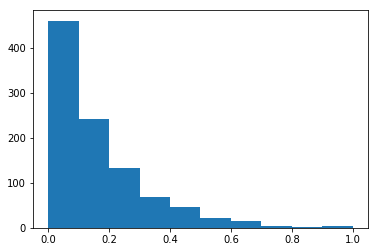

In [30]:
plt.hist(scaled_data)

Text(0.5, 1.0, 'Normalized data')

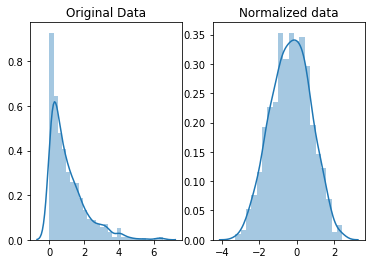

In [53]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [56]:
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-886763c4098d>", line 1, in <module>
    usd_goal = kickstarters_2017.usd_goal_real
NameError: name 'kickstarters_2017' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\study\anaconda\lib\site-packages\tens

NameError: name 'kickstarters_2017' is not defined

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-37b06283d97a>", line 8, in <module>
    sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
NameError: name 'kickstarters_2017' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\study\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\study\anaconda\lib\site-

NameError: name 'kickstarters_2017' is not defined

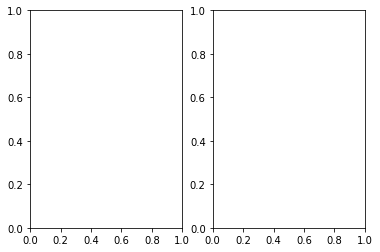

In [60]:
usd_goal = kick["usd pledged"]

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [59]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
